<img src="logo-text.png"/>


In [1]:
# Matplotlib 2.0 or from a new   

### Southhampton Python User Group May 2015

**Jens Hedegaard Nielsen** | jenshnielsen@gmail.com jens.nielsen@ucl.ac.uk | UCL

Core Matplotlib contributor

This notebook requires matplotlib 2.x development branch

In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import datetime as dt
import itertools
import matplotlib

/Users/jhn/Envs/mpl2x/lib/python3.5/site-packages/matplotlib/font_manager.py:279: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/jhn/Envs/mpl2x/lib/python3.5/site-packages/matplotlib/font_manager.py:279: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# Ultra Short History of Matplotlib

In [ ]:
When, who and what

## matplotlib is alive and well

- Officially a NumFocus project
- More developer resources available

### Other stats

- matplotlib.org
  - 470k sessions/month
  - 1.4m page views/month
  - google thinks 190k users/month
  - cute patterns in time
- github
  - 40k views/month
  - 14k users/month
  - 1.3k unique cloners/month
  - 1.3k forks
- source forge
  - 60-120k monthly downloads (39-55% windows)
  - 2M total downloads in last 2 years
  - spikes of 100k/month around releases
- pypi
  - 190k/month
- Debian popcon
  - 93rd percentile in popularity among all Debian packages
- Other
  - Doesn't include Cristoph Gohlke, Enthought Canopy, Continuum Anaconda, other Linux and Mac packaging

## Release Schedule

- May, 2016: Version 1.5.2 bug fix relase
- May, 2016: first beta of Version 2.0: Style changes "only" relase to follow
- September, 2016: Version 2.1: Regular feature release, Traitlets

# Matplotlib style changes

[Rainbow Color Map (Still) Considered Harmful](http://ieeexplore.ieee.org/xpls/abs_all.jsp?arnumber=4118486&tag=1)


[Replace "jet" as the default colormap](https://github.com/matplotlib/matplotlib/issues/875)

## Image interpolation

First Matplotlib plot in Software Carpentry [Python Novice lecture 1](http://swcarpentry.github.io/python-novice-inflammation/01-numpy.html)


* Jet colormap
* "Fuzzy" due to interpolation

<img src="01-numpy_71_0.png"/>

<IPython.core.display.Javascript object>


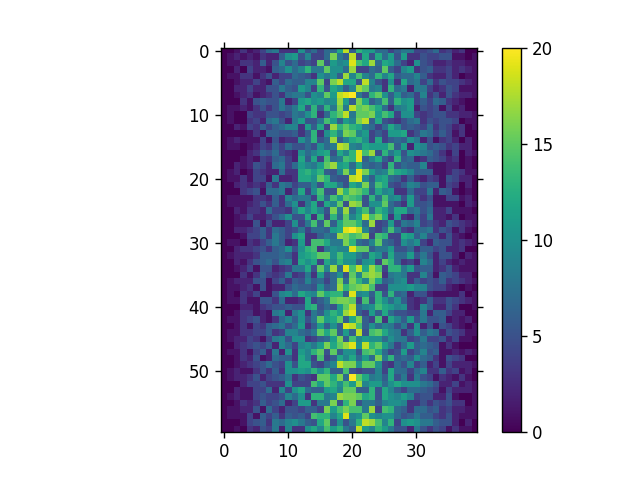

In [7]:
data = np.loadtxt(fname='inflammation-01.csv', delimiter=',')
plt.imshow(data)
plt.colorbar()

* Interpolation in RGB Space
* Discover bug that we didn't even know existed
* Rewrite x lines of c++
* Fix y old image bug

# New default color cycle

Color cycle for line plots
Used to be 
* B
* G
* R
* K
* C
* M
* Y

<IPython.core.display.Javascript object>


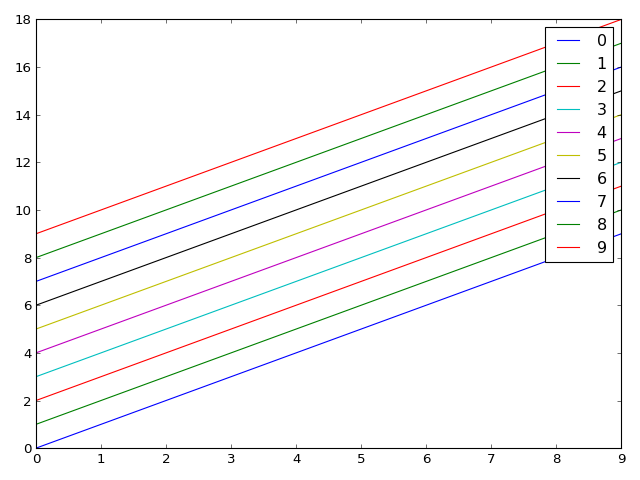

In [18]:
with matplotlib.style.context('classic'):
    x = np.arange(10)
    fig, ax = plt.subplots(1,1)
    for i in range(10):
        y = x + i
        ax.plot(x, y, label=str(i))
    ax.legend()
fig.tight_layout()

<IPython.core.display.Javascript object>


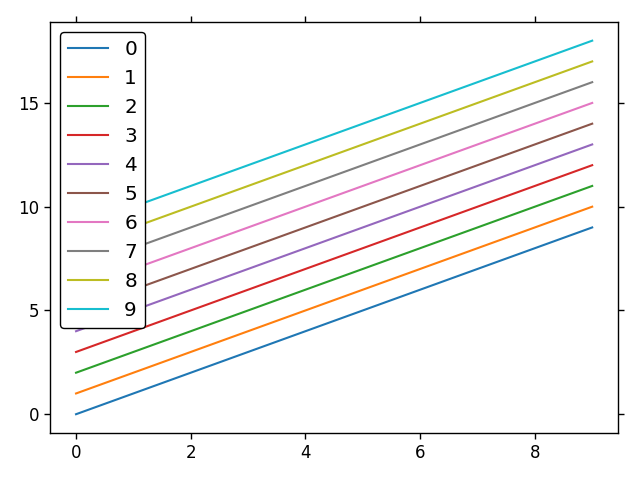

In [19]:
x = np.arange(10)
fig, ax = plt.subplots(1,1)
for i in range(10):
    y = x + i
    ax.plot(x, y, label=str(i))
ax.legend()
fig.tight_layout()

Still need to adjust the legend size see Github PR: [Legend default style change: smaller, no border](https://github.com/matplotlib/matplotlib/pull/6424)

What to do if you need to refere to one of the colors 
Cn syntax

# More examples

Documentation build automatically from the master branch.
Build from master branch but very similar to 2.x
* [Matplotlib devdocs](http://matplotlib.org/devdocs)
* [Matplotlib gallery](http://matplotlib.org/devdocs/gallery.html)
* [Matplotlib examples](http://matplotlib.org/devdocs/examples/index.html)

# DEMOS

All working with 2.x

## Notebook AGG (`%matplotlib nbagg` or `%matplotlib notebook`)

 - interactive front end for mpl in the notebook
 - needs a live python kernel on the server side
   - only a png in nbviewer
 - Mike Droettboom, Jason Grout, Phil Elson, Steven Silvester 
 - full mouse/key events back into python layer

<IPython.core.display.Javascript object>


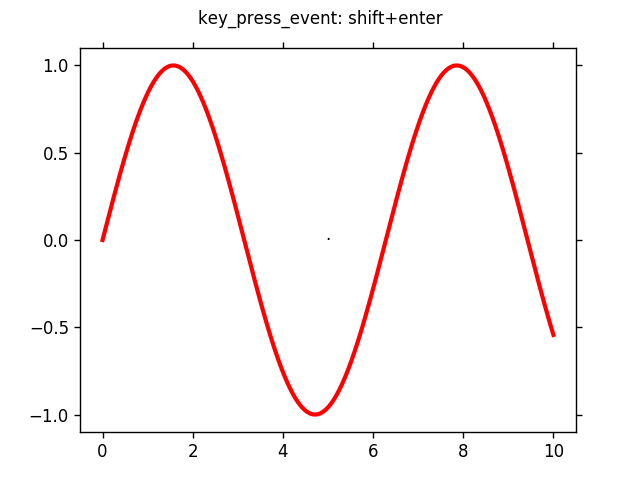

10

In [2]:
fig, ax = plt.subplots()
x = np.linspace(0,10,10000)
y = np.sin(x)
ln, = ax.plot(x,y, lw=3)
evt = []
colors = iter(itertools.cycle(['r', 'g', 'b', 'k', 'purple']))

txt = ax.annotate('.', (.5, .5), xycoords='axes fraction', ha='center')

def on_event(event):
    if event.name.startswith('key'):
        if len(event.key) == 1:
            txt.set_text(txt.get_text() + event.key)
        elif event.key == 'backspace':
            txt.set_text(txt.get_text()[:-1])
        fig.suptitle('%s: %s' % (event.name, event.key))
    elif event.name == 'scroll_event':
        fig.suptitle('%s: %s' % (event.name, event.step))
    else:
        fig.suptitle('%s: %s' % (event.name, event.button))
    evt.append(event)
    ln.set_color(next(colors))

fig.canvas.mpl_connect('button_press_event', on_event)
fig.canvas.mpl_connect('button_release_event', on_event)
fig.canvas.mpl_connect('scroll_event', on_event)
fig.canvas.mpl_connect('key_press_event', on_event)

## Animation

<IPython.core.display.Javascript object>


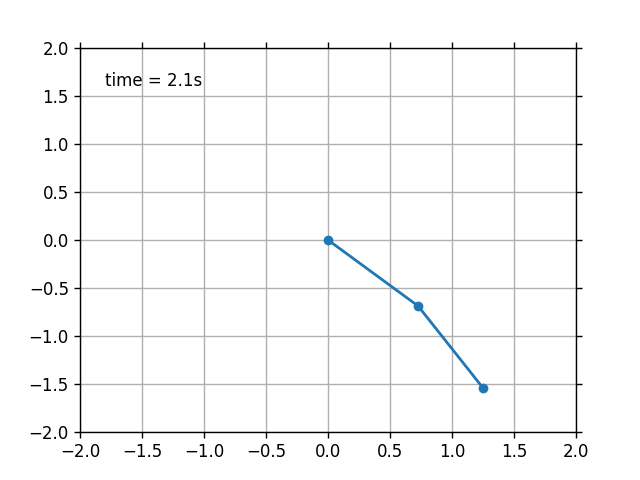

In [4]:
from numpy import sin, cos
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation

G = 9.8  # acceleration due to gravity, in m/s^2
L1 = 1.0  # length of pendulum 1 in m
L2 = 1.0  # length of pendulum 2 in m
M1 = 1.0  # mass of pendulum 1 in kg
M2 = 1.0  # mass of pendulum 2 in kg

def derivs(state, t):
    dydx = np.zeros_like(state)
    dydx[0] = state[1]

    del_ = state[2] - state[0]
    den1 = (M1 + M2)*L1 - M2*L1*cos(del_)*cos(del_)
    dydx[1] = (M2*L1*state[1]*state[1]*sin(del_)*cos(del_) +
               M2*G*sin(state[2])*cos(del_) +
               M2*L2*state[3]*state[3]*sin(del_) -
               (M1 + M2)*G*sin(state[0]))/den1

    dydx[2] = state[3]

    den2 = (L2/L1)*den1
    dydx[3] = (-M2*L2*state[3]*state[3]*sin(del_)*cos(del_) +
               (M1 + M2)*G*sin(state[0])*cos(del_) -
               (M1 + M2)*L1*state[1]*state[1]*sin(del_) -
               (M1 + M2)*G*sin(state[2]))/den2

    return dydx

# create a time array from 0..100 sampled at 0.05 second steps
dt = 0.05
t = np.arange(0.0, 20, dt)

# th1 and th2 are the initial angles (degrees)
# w10 and w20 are the initial angular velocities (degrees per second)
th1 = 120.0
w1 = 0.0
th2 = -10.0
w2 = 0.0

# initial state
state = np.radians([th1, w1, th2, w2])

# integrate your ODE using scipy.integrate.
y = integrate.odeint(derivs, state, t)

x1 = L1*sin(y[:, 0])
y1 = -L1*cos(y[:, 0])

x2 = L2*sin(y[:, 2]) + x1
y2 = -L2*cos(y[:, 2]) + y1

fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2, 2), ylim=(-2, 2))
ax.grid()

line, = ax.plot([], [], 'o-', lw=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)


def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text


def animate(i):
    thisx = [0, x1[i], x2[i]]
    thisy = [0, y1[i], y2[i]]

    line.set_data(thisx, thisy)
    time_text.set_text(time_template % (i*dt))
    return line, time_text

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(y)),
                              interval=25, blit=True, init_func=init)

plt.show()


## matplotlib.style
 - partially update rcparams (default values)
 - Tony Yu 

In [5]:
import matplotlib.style as ms
ms.available

['seaborn-whitegrid',
 'seaborn-dark-palette',
 'grayscale',
 'seaborn-ticks',
 'seaborn-dark',
 'seaborn-deep',
 'seaborn-notebook',
 'fivethirtyeight',
 'seaborn-talk',
 'bmh',
 'seaborn-muted',
 'seaborn-colorblind',
 'seaborn-paper',
 'dark_background',
 'seaborn-poster',
 'seaborn-white',
 'seaborn-darkgrid',
 'seaborn-pastel',
 'transparent_background',
 'seaborn-bright',
 'classic',
 'ggplot']

<IPython.core.display.Javascript object>


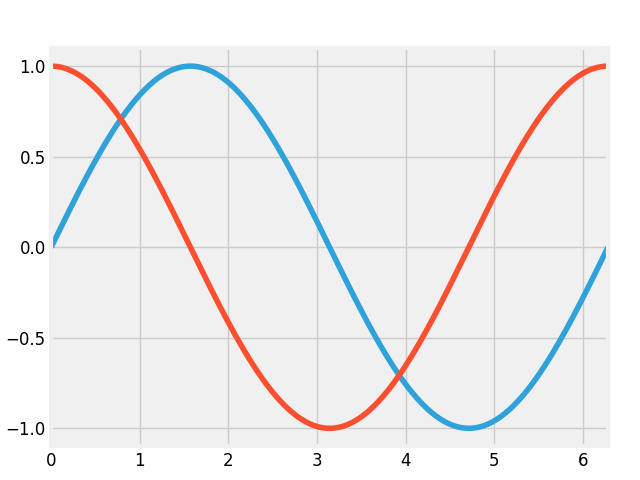

In [6]:
th = np.linspace(0, 2*np.pi, 1024)

with ms.context('fivethirtyeight'):
    fig, ax = plt.subplots()
    ln_sin, = ax.plot(th, np.sin(th))
    ln_cos, = ax.plot(th, np.cos(th))
    ax.set_xlim(0, 2*np.pi)

<IPython.core.display.Javascript object>


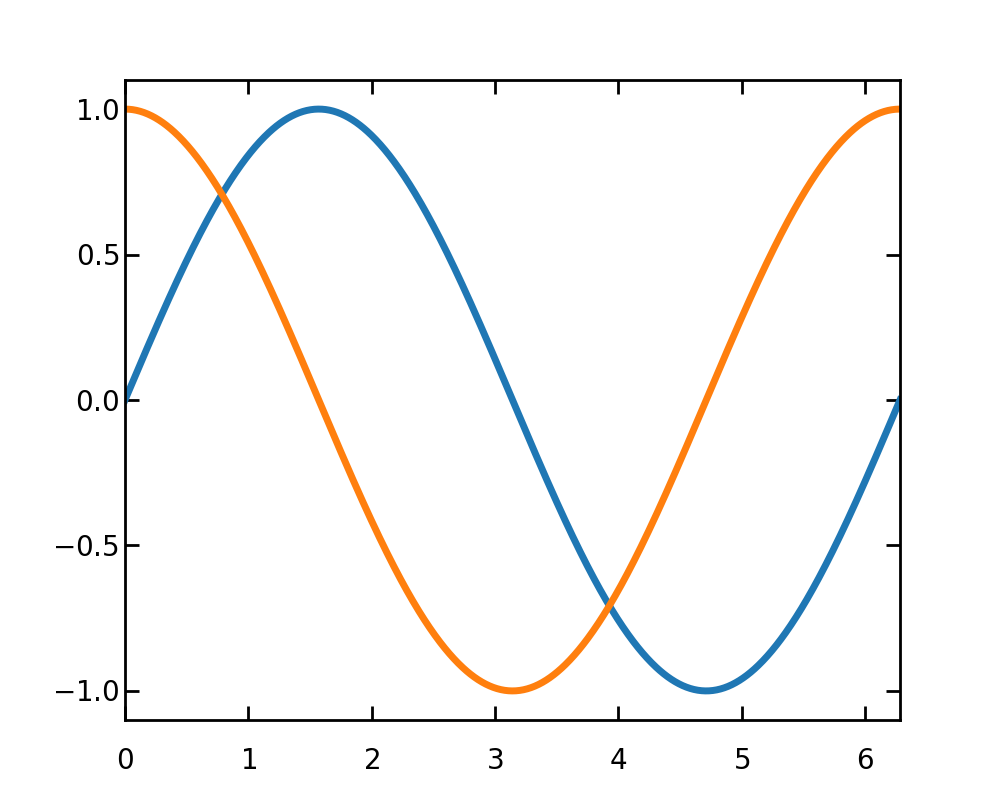

In [8]:
leheny = 'http://tiny.cc/leheny-style/raw'

with ms.context(leheny):
    fig, ax = plt.subplots()
    ln_sin, = ax.plot(th, np.sin(th))
    ln_cos, = ax.plot(th, np.cos(th))
    ax.set_xlim(0, 2*np.pi)

## Automatic updating without pyplot

<IPython.core.display.Javascript object>


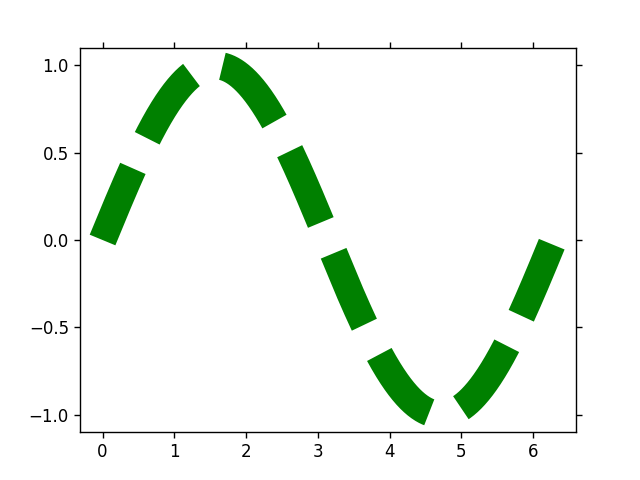

In [7]:
fig, ax = plt.subplots()
ln, = ax.plot(th, np.sin(th), ls='--')

In [9]:
ln.set_color('green')
ln.set_linewidth(20)

## String labels to bar plots

<IPython.core.display.Javascript object>


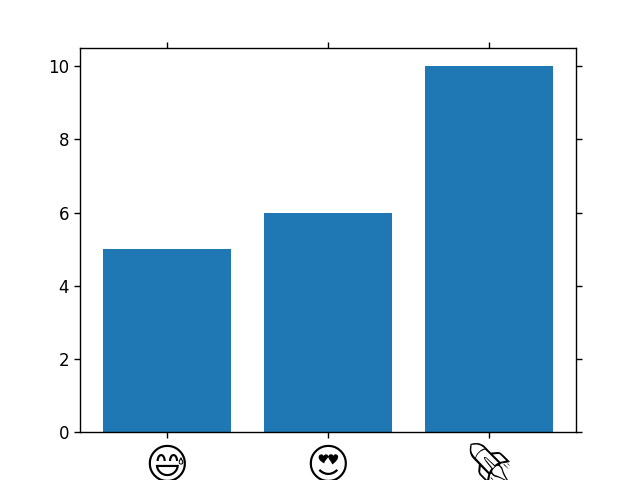

[(None, None), (None, None), (None, None)]

In [10]:
fig, ax = plt.subplots()
ax.bar(range(3), [5, 6, 10], tick_label=list('😅😍🚀'), align='center')
[(t.set_fontname('symbola'), t.set_fontsize(32)) for t in ax.xaxis.get_ticklabels()]

## Cycler

In [11]:
import cycler as cr

<IPython.core.display.Javascript object>


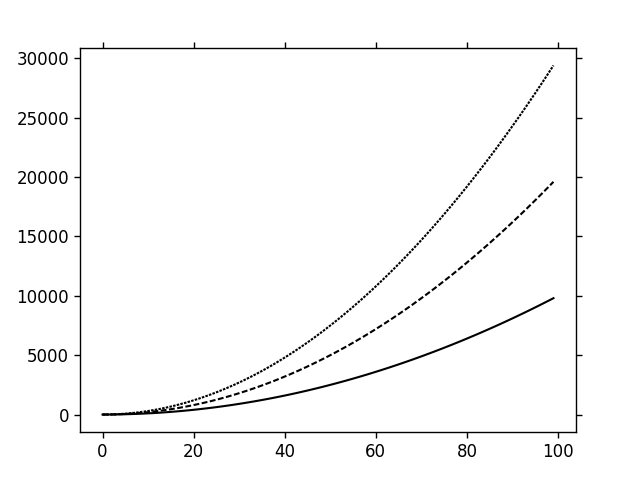

In [12]:
plt.figure()

x = np.arange(100)
with plt.rc_context(rc={'axes.prop_cycle': "cycler('color', 'k') * cycler('ls', ['-', '--', ':'])"}):
    plt.plot(x ** 2)
    plt.plot(x ** 2 * 2)
    plt.plot(x ** 2 * 3)

<IPython.core.display.Javascript object>


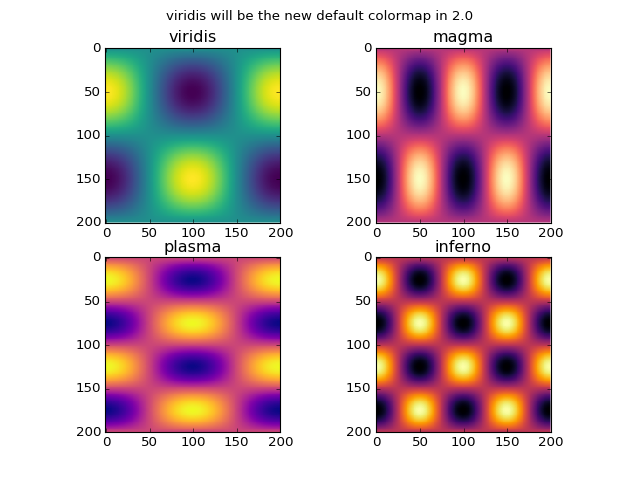

In [7]:
from cycler import cycler

cmap = cycler('cmap', ['viridis', 'magma','plasma', 'inferno'])
x_mode = cycler('x', [1, 2])
y_mode = cycler('y', x_mode)

def demo(ax, x, y, cmap):
    X, Y = np.ogrid[0:2*np.pi:200j, 0:2*np.pi:200j]
    data = np.sin(X*x) * np.cos(Y*y)
    ax.imshow(data, interpolation='none', cmap=cmap)
    ax.set_title(cmap)
    
cy = (x_mode * y_mode) + cmap 


fig, axes = plt.subplots(2, 2)
for ax, sty in zip(axes.ravel(), cy):
    demo(ax, **sty)
fig.suptitle('viridis will be the new default colormap in 2.0')    

## Labeled data support

In [13]:
autos = pd.read_csv('auto-mpg.csv')
autos

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


<IPython.core.display.Javascript object>


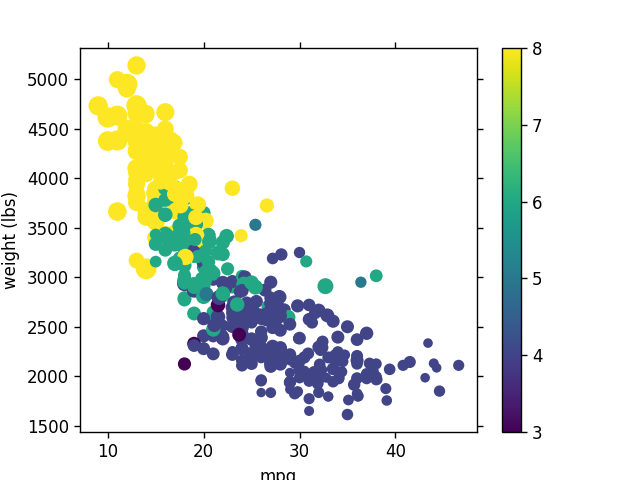

In [14]:
fig, ax = plt.subplots()
sc = ax.scatter('mpg', 'weight', 'hp', 'cyl', data=autos)
plt.colorbar(sc)
ax.set_ylabel('weight (lbs)')
ax.set_xlabel('mpg')

## Easy faceting

<IPython.core.display.Javascript object>


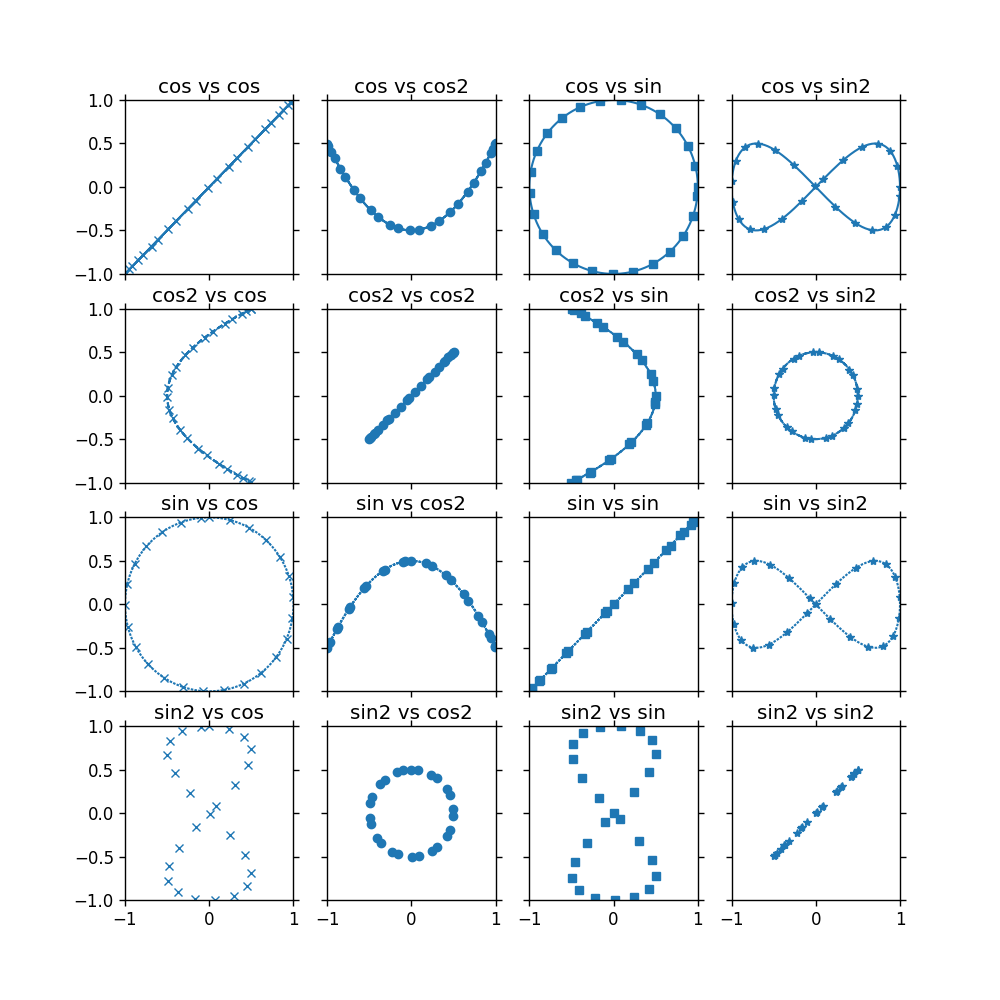

In [15]:

from cycler import cycler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def simple_plot(ax, x, y, **kwargs):
    return ax.plot(x, y, **kwargs)

th = np.linspace(0, 2*np.pi, 128)
df = pd.DataFrame({'sin': np.sin(th), 'cos': np.cos(th),
                   'sin2': .5 * np.sin(2 * th), 'cos2': .5 * np.cos(2 * th)})

def easy_facet(df, cycle1, cycle2):
    cycleX = (cycler('x', df.keys()) + cycle1)
    cycleY = (cycler('y', df.keys()) + cycle2) 
    kw_cycle = cycleX * cycleY

    fig, axes = plt.subplots(len(df.keys()), len(df.keys()), sharex=True, sharey=True,
                             figsize=(10, 10))
    lines = []
    axes[0, 0].set_xlim([-1, 1])
    axes[0, 0].set_ylim([-1, 1])
    for ax, kwargs in zip(axes.ravel(), kw_cycle):
        
        ln, = simple_plot(ax, markevery=5, data=df, **kwargs)
        ax.set_title('{x} vs {y}'.format(**kwargs))
        lines.append(ln)
        
    return lines


arts = easy_facet(df, cycler('linestyle', ['-', '--', ':', '']), cycler('marker', 'xos*'))

## Other new features

 - auto-wrapping of long text
 
 <img src="whats_new-2.png"/>
 
 - contour corner masking
 
 <img src="contour_corner_mask2.png"/>
 
 - smooth colorbars
 - legend support for more collections
 - per-artist usetex control
 - unified line style across Line, Patch, and Collection
 - add page notes in multi-page pdfs
 - support both wxpython classic and wxpython phoenix (python 3 support)
 - Added 'logit' axis scale
 - Major improvements to table


# The future

## Version 2.0

### Style changes only

## Version 2.1

### Better interoperability

 - nbagg + widget integration (jupyter notebook, Steven Silvester)
 - better containers classes 
 - serialization & traitlets (Brian Granger / Ryan Morshead)
 
## Beyond
 
<img src="lego2.jpg"/>

### Place in community

 - we really are low on resources, but that's improving
 - always looking for new contributors 
 - usage now well outside domain knowledge of core-devs
  - looking for domain experts to develop specialized plotting tools
  - happy to host projects built on top of mpl under matplotlib.org organization
 - we are a substrate for domain-specific plotting (seaborn, pandas, glueviz, holoviews etc)

## Thank you

  - John Hunter

In [13]:
import textwrap
commits = pd.read_csv('commits_time_author.csv', sep='&')
commiters = Counter(commits['name'])
print('\n'.join(textwrap.wrap(', '.join(sorted([n.split('<')[0].rstrip() for n in commiters.keys()])))))

Acanthostega, Adam Ginsburg, Adam Heck, Adrian Price-Whelan, Alan Du,
Alejandro Dubrovsky, Alex Loew, Alexander Taylor, Alexei Colin, Ali
Mehdi, Alistair Muldal, Allan Haldane, AmyTeegarden, Andrea Bedini,
Andreas Wallner, Andrew Dawson, Andrew Merrill, Andy Zhu, Anton
Akhmerov, Antony Lee, Arie, Ariel Hernán Curiale, Arnaud Gardelein,
Arpad Horvath, Aseem Bansal, Behram Mistree, Ben Cohen, Ben Gamari,
Ben Keller, Ben Root, Benjamin Reedlunn, Binglin Chang, Bradley M.
Froehle, Brandon Liu, Brett Cannon, Brian Mattern, Brian McLaughlin,
Bruno Beltran, CJ Carey, Cameron Bates, Cameron Davidson-Pilon,
Carissa Brittain, Carwyn Pelley, Casey Webster, Casper van der Wel,
Chris Beaumont, Chris G, Christian Brueffer, Christoph Gohlke,
Christoph Hoffmann, Cimarron Mittelsteadt, Damon McDougall,
Danhickstein, Daniel Hyams, Daniel O'Connor, Dara Adib, David, David
Anderson, David Haberthür, David Kua, David Trémouilles, Dean
Malmgren, Dmitry Lupyan, DonaldSeo, Dora Fraeman, Duncan Macleod,
Elena